# COMP47590 Advanced Machine Learning
# MLP with Pytorch

Building and trianing an MLP with PyTorch.

### Install PyTorch

Select your preferences and run the install command. Stable represents the most currently tested and supported version of PyTorch. This should be suitable for many users. Please ensure that you have <span style="color:red">**met the prerequisites below (e.g., numpy)**</span>, depending on your package manager. Anaconda is our recommended package manager since it installs all dependencies.

<img src="PYTORCH_command.jpg"  width="60%" height="60%">

### Import Packages

Import packages that will be used in this demo.

In [18]:
import numpy as np   # to handle matrix and data operation
import pandas as pd  # to read csv and handle dataframe
np.random.seed(1337) # for reproducibility
pd.set_option('display.max_columns', None) # to display all columns

import matplotlib.pyplot as plt
%matplotlib inline


import os
import random
import scipy as sp
import PIL

import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 2.5.1


### Dataset Pre-Processing

Read in the mnist dataset and prepare it for learning. This noramlises the values to between 0 and 1, and divides the data into Train, Validation and Test sets.

In [19]:
file_name = "../Data/mnist_train.csv"
target_feature = 'label'

In [20]:
dataset = pd.read_csv(file_name)
print('The original size of dataset:', dataset.shape)

# Make a random sample from the full dataset
sample_rate = 0.3
dataset = dataset.sample(frac=sample_rate)
print('The sampled size of dataset', dataset.shape)

dataset.head()

The original size of dataset: (60000, 785)
The sampled size of dataset (18000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,2x13,2x14,2x15,2x16,2x17,2x18,2x19,2x20,2x21,2x22,2x23,2x24,2x25,2x26,2x27,2x28,3x1,3x2,3x3,3x4,3x5,3x6,3x7,3x8,3x9,3x10,3x11,3x12,3x13,3x14,3x15,3x16,3x17,3x18,3x19,3x20,3x21,3x22,3x23,3x24,3x25,3x26,3x27,3x28,4x1,4x2,4x3,4x4,4x5,4x6,4x7,4x8,4x9,4x10,4x11,4x12,4x13,4x14,4x15,4x16,4x17,4x18,4x19,4x20,4x21,4x22,4x23,4x24,4x25,4x26,4x27,4x28,5x1,5x2,5x3,5x4,5x5,5x6,5x7,5x8,5x9,5x10,5x11,5x12,5x13,5x14,5x15,5x16,5x17,5x18,5x19,5x20,5x21,5x22,5x23,5x24,5x25,5x26,5x27,5x28,6x1,6x2,6x3,6x4,6x5,6x6,6x7,6x8,6x9,6x10,6x11,6x12,6x13,6x14,6x15,6x16,6x17,6x18,6x19,6x20,6x21,6x22,6x23,6x24,6x25,6x26,6x27,6x28,7x1,7x2,7x3,7x4,7x5,7x6,7x7,7x8,7x9,7x10,7x11,7x12,7x13,7x14,7x15,7x16,7x17,7x18,7x19,7x20,7x21,7x22,7x23,7x24,7x25,7x26,7x27,7x28,8x1,8x2,8x3,8x4,8x5,8x6,8x7,8x8,8x9,8x10,8x11,8x12,8x13,8x14,8x15,8x16,8x17,8x18,8x19,8x20,8x21,8x22,8x23,8x24,8x25,8x26,8x27,8x28,9x1,9x2,9x3,9x4,9x5,9x6,9x7,9x8,9x9,9x10,9x11,9x12,9x13,9x14,9x15,9x16,9x17,9x18,9x19,9x20,9x21,9x22,9x23,9x24,9x25,9x26,9x27,9x28,10x1,10x2,10x3,10x4,10x5,10x6,10x7,10x8,10x9,10x10,10x11,10x12,10x13,10x14,10x15,10x16,10x17,10x18,10x19,10x20,10x21,10x22,10x23,10x24,10x25,10x26,10x27,10x28,11x1,11x2,11x3,11x4,11x5,11x6,11x7,11x8,11x9,11x10,11x11,11x12,11x13,11x14,11x15,11x16,11x17,11x18,11x19,11x20,11x21,11x22,11x23,11x24,11x25,11x26,11x27,11x28,12x1,12x2,12x3,12x4,12x5,12x6,12x7,12x8,12x9,12x10,12x11,12x12,12x13,12x14,12x15,12x16,12x17,12x18,12x19,12x20,12x21,12x22,12x23,12x24,12x25,12x26,12x27,12x28,13x1,13x2,13x3,13x4,13x5,13x6,13x7,13x8,13x9,13x10,13x11,13x12,13x13,13x14,13x15,13x16,13x17,13x18,13x19,13x20,13x21,13x22,13x23,13x24,13x25,13x26,13x27,13x28,14x1,14x2,14x3,14x4,14x5,14x6,14x7,14x8,14x9,14x10,14x11,14x12,14x13,14x14,14x15,14x16,14x17,14x18,14x19,14x20,14x21,14x22,14x23,14x24,14x25,14x26,14x27,14x28,15x1,15x2,15x3,15x4,15x5,15x6,15x7,15x8,15x9,15x10,15x11,15x12,15x13,15x14,15x15,15x16,15x17,15x18,15x19,15x20,15x21,15x22,15x23,15x24,15x25,15x26,15x27,15x28,16x1,16x2,16x3,16x4,16x5,16x6,16x7,16x8,16x9,16x10,16x11,16x12,16x13,16x14,16x15,16x16,16x17,16x18,16x19,16x20,16x21,16x22,16x23,16x24,16x25,16x26,16x27,16x28,17x1,17x2,17x3,17x4,17x5,17x6,17x7,17x8,17x9,17x10,17x11,17x12,17x13,17x14,17x15,17x16,17x17,17x18,17x19,17x20,17x21,17x22,17x23,17x24,17x25,17x26,17x27,17x28,18x1,18x2,18x3,18x4,18x5,18x6,18x7,18x8,18x9,18x10,18x11,18x12,18x13,18x14,18x15,18x16,18x17,18x18,18x19,18x20,18x21,18x22,18x23,18x24,18x25,18x26,18x27,18x28,19x1,19x2,19x3,19x4,19x5,19x6,19x7,19x8,19x9,19x10,19x11,19x12,19x13,19x14,19x15,19x16,19x17,19x18,19x19,19x20,19x21,19x22,19x23,19x24,19x25,19x26,19x27,19x28,20x1,20x2,20x3,20x4,20x5,20x6,20x7,20x8,20x9,20x10,20x11,20x12,20x13,20x14,20x15,20x16,20x17,20x18,20x19,20x20,20x21,20x22,20x23,20x24,20x25,20x26,20x27,20x28,21x1,21x2,21x3,21x4,21x5,21x6,21x7,21x8,21x9,21x10,21x11,21x12,21x13,21x14,21x15,21x16,21x17,21x18,21x19,21x20,21x21,21x22,21x23,21x24,21x25,21x26,21x27,21x28,22x1,22x2,22x3,22x4,22x5,22x6,22x7,22x8,22x9,22x10,22x11,22x12,22x13,22x14,22x15,22x16,22x17,22x18,22x19,22x20,22x21,22x22,22x23,22x24,22x25,22x26,22x27,22x28,23x1,23x2,23x3,23x4,23x5,23x6,23x7,23x8,23x9,23x10,23x11,23x12,23x13,23x14,23x15,23x16,23x17,23x18,23x19,23x20,23x21,23x22,23x23,23x24,23x25,23x26,23x27,23x28,24x1,24x2,24x3,24x4,24x5,24x6,24x7,24x8,24x9,24x10,24x11,24x12,24x13,24x14,24x15,24x16,24x17,24x18,24x19,24x20,24x21,24x22,24x23,24x24,24x25,24x26,24x27,24x28,25x1,25x2,25x3,25x4,25x5,25x6,25x7,25x8,25x9,25x10,25x11,25x12,25x13,25x14,25x15,25x16,25x17,25x18,25x19,25x20,25x21,25x22,25x23,25x24,25x25,25x26,25x27,25x28,26x1,26x2,26x3,26x4,26x5,26x6,26x7,26x8,26x9,26x10,26x11,26x12,26x13,26x14,26x15,26x16,26x17,26x18,26x19,26x20,26x21,26x22,26x23,26x24,26x25,26x26,26x27,26x28,27x1,27x2,27x3,27x4,27x5,27x6,27x7,27x8,27x9,27x10,27x11,27x12,27x13,27x14,27x15,27x16,27x17,27x18,27x19,27x20,

In [21]:
# Put all but the target variable into the descriptive features array
X = dataset.drop([target_feature], axis = 1)
y = dataset[target_feature]

# Use a range scaling to scale all variables to between 0 and 1
X = X/255
X = (X)*2 - 1

print(X.min().min(), X.max().max() )

X.head()

-1.0 1.0


,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,2x13,2x14,2x15,2x16,2x17,2x18,2x19,2x20,2x21,2x22,2x23,2x24,2x25,2x26,2x27,2x28,3x1,3x2,3x3,3x4,3x5,3x6,3x7,3x8,3x9,3x10,3x11,3x12,3x13,3x14,3x15,3x16,3x17,3x18,3x19,3x20,3x21,3x22,3x23,3x24,3x25,3x26,3x27,3x28,4x1,4x2,4x3,4x4,4x5,4x6,4x7,4x8,4x9,4x10,4x11,4x12,4x13,4x14,4x15,4x16,4x17,4x18,4x19,4x20,4x21,4x22,4x23,4x24,4x25,4x26,4x27,4x28,5x1,5x2,5x3,5x4,5x5,5x6,5x7,5x8,5x9,5x10,5x11,5x12,5x13,5x14,5x15,5x16,5x17,5x18,5x19,5x20,5x21,5x22,5x23,5x24,5x25,5x26,5x27,5x28,6x1,6x2,6x3,6x4,6x5,6x6,6x7,6x8,6x9,6x10,6x11,6x12,6x13,6x14,6x15,6x16,6x17,6x18,6x19,6x20,6x21,6x22,6x23,6x24,6x25,6x26,6x27,6x28,7x1,7x2,7x3,7x4,7x5,7x6,7x7,7x8,7x9,7x10,7x11,7x12,7x13,7x14,7x15,7x16,7x17,7x18,7x19,7x20,7x21,7x22,7x23,7x24,7x25,7x26,7x27,7x28,8x1,8x2,8x3,8x4,8x5,8x6,8x7,8x8,8x9,8x10,8x11,8x12,8x13,8x14,8x15,8x16,8x17,8x18,8x19,8x20,8x21,8x22,8x23,8x24,8x25,8x26,8x27,8x28,9x1,9x2,9x3,9x4,9x5,9x6,9x7,9x8,9x9,9x10,9x11,9x12,9x13,9x14,9x15,9x16,9x17,9x18,9x19,9x20,9x21,9x22,9x23,9x24,9x25,9x26,9x27,9x28,10x1,10x2,10x3,10x4,10x5,10x6,10x7,10x8,10x9,10x10,10x11,10x12,10x13,10x14,10x15,10x16,10x17,10x18,10x19,10x20,10x21,10x22,10x23,10x24,10x25,10x26,10x27,10x28,11x1,11x2,11x3,11x4,11x5,11x6,11x7,11x8,11x9,11x10,11x11,11x12,11x13,11x14,11x15,11x16,11x17,11x18,11x19,11x20,11x21,11x22,11x23,11x24,11x25,11x26,11x27,11x28,12x1,12x2,12x3,12x4,12x5,12x6,12x7,12x8,12x9,12x10,12x11,12x12,12x13,12x14,12x15,12x16,12x17,12x18,12x19,12x20,12x21,12x22,12x23,12x24,12x25,12x26,12x27,12x28,13x1,13x2,13x3,13x4,13x5,13x6,13x7,13x8,13x9,13x10,13x11,13x12,13x13,13x14,13x15,13x16,13x17,13x18,13x19,13x20,13x21,13x22,13x23,13x24,13x25,13x26,13x27,13x28,14x1,14x2,14x3,14x4,14x5,14x6,14x7,14x8,14x9,14x10,14x11,14x12,14x13,14x14,14x15,14x16,14x17,14x18,14x19,14x20,14x21,14x22,14x23,14x24,14x25,14x26,14x27,14x28,15x1,15x2,15x3,15x4,15x5,15x6,15x7,15x8,15x9,15x10,15x11,15x12,15x13,15x14,15x15,15x16,15x17,15x18,15x19,15x20,15x21,15x22,15x23,15x24,15x25,15x26,15x27,15x28,16x1,16x2,16x3,16x4,16x5,16x6,16x7,16x8,16x9,16x10,16x11,16x12,16x13,16x14,16x15,16x16,16x17,16x18,16x19,16x20,16x21,16x22,16x23,16x24,16x25,16x26,16x27,16x28,17x1,17x2,17x3,17x4,17x5,17x6,17x7,17x8,17x9,17x10,17x11,17x12,17x13,17x14,17x15,17x16,17x17,17x18,17x19,17x20,17x21,17x22,17x23,17x24,17x25,17x26,17x27,17x28,18x1,18x2,18x3,18x4,18x5,18x6,18x7,18x8,18x9,18x10,18x11,18x12,18x13,18x14,18x15,18x16,18x17,18x18,18x19,18x20,18x21,18x22,18x23,18x24,18x25,18x26,18x27,18x28,19x1,19x2,19x3,19x4,19x5,19x6,19x7,19x8,19x9,19x10,19x11,19x12,19x13,19x14,19x15,19x16,19x17,19x18,19x19,19x20,19x21,19x22,19x23,19x24,19x25,19x26,19x27,19x28,20x1,20x2,20x3,20x4,20x5,20x6,20x7,20x8,20x9,20x10,20x11,20x12,20x13,20x14,20x15,20x16,20x17,20x18,20x19,20x20,20x21,20x22,20x23,20x24,20x25,20x26,20x27,20x28,21x1,21x2,21x3,21x4,21x5,21x6,21x7,21x8,21x9,21x10,21x11,21x12,21x13,21x14,21x15,21x16,21x17,21x18,21x19,21x20,21x21,21x22,21x23,21x24,21x25,21x26,21x27,21x28,22x1,22x2,22x3,22x4,22x5,22x6,22x7,22x8,22x9,22x10,22x11,22x12,22x13,22x14,22x15,22x16,22x17,22x18,22x19,22x20,22x21,22x22,22x23,22x24,22x25,22x26,22x27,22x28,23x1,23x2,23x3,23x4,23x5,23x6,23x7,23x8,23x9,23x10,23x11,23x12,23x13,23x14,23x15,23x16,23x17,23x18,23x19,23x20,23x21,23x22,23x23,23x24,23x25,23x26,23x27,23x28,24x1,24x2,24x3,24x4,24x5,24x6,24x7,24x8,24x9,24x10,24x11,24x12,24x13,24x14,24x15,24x16,24x17,24x18,24x19,24x20,24x21,24x22,24x23,24x24,24x25,24x26,24x27,24x28,25x1,25x2,25x3,25x4,25x5,25x6,25x7,25x8,25x9,25x10,25x11,25x12,25x13,25x14,25x15,25x16,25x17,25x18,25x19,25x20,25x21,25x22,25x23,25x24,25x25,25x26,25x27,25x28,26x1,26x2,26x3,26x4,26x5,26x6,26x7,26x8,26x9,26x10,26x11,26x12,26x13,26x14,26x15,26x16,26x17,26x18,26x19,26x20,26x21,26x22,26x23,26x24,26x25,26x26,26x27,26x28,27x1,27x2,27x3,27x4,27x5,27x6,27x7,27x8,27x9,27x10,27x11,27x12,27x13,27x14,27x15,27x16,27x17,27x18,27x19,27x20,27x21,

In [22]:
# Perfrom split to train, validation, test
x_train_plus_valid, x_test, y_train_plus_valid, y_test = train_test_split(X, y, random_state=0, test_size=0.30, train_size=0.7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_plus_valid, y_train_plus_valid, random_state=0, test_size=0.30, train_size=0.7)

# convert to numpy arrays
x_train = x_train.values
x_valid = x_valid.values
x_test = x_test.values

# Copy the dataframes for plotting later
x_train_cat = x_train.copy()
x_valid_cat = x_valid.copy()
x_test_cat = x_test.copy()

y_train_cat = y_train.copy()
y_valid_cat = y_valid.copy()
y_test_cat = y_test.copy()

# convert to numpy arrays
y_train = y_train.values
y_valid = y_valid.values
y_test = y_test.values

Print some images from the training set

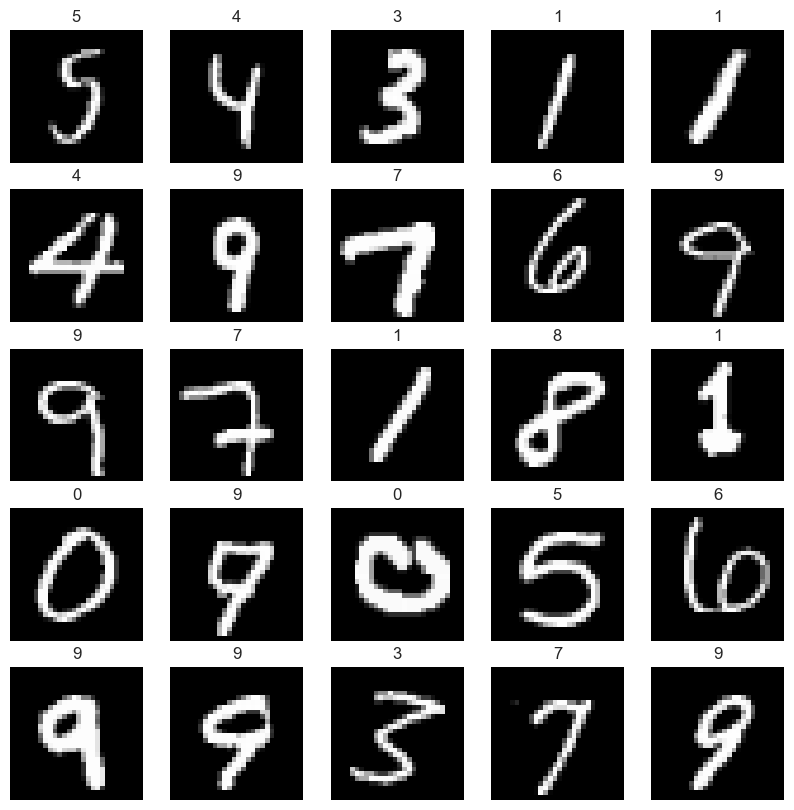

In [23]:
pltsize=2
row_images = 5
col_images = 5
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(row_images * col_images):
    i_rand = random.randint(0, x_train.shape[0])
    plt.subplot(row_images,col_images,i+1)
    plt.axis('off')
    plt.imshow((x_train_cat[i_rand]).reshape(28,28), cmap='gray', vmin=-1, vmax=1)
    plt.title((str(y_train_cat.iloc[i_rand])))
    
plt.show()

Prepare the data for pytorch.

In [24]:
# Convert the features and labels to PyTorch tensors
x_train = torch.tensor(x_train).float()
x_valid = torch.tensor(x_valid).float()
x_test = torch.tensor(x_test).float()

In [25]:
num_classes = 10

y_train = torch.tensor(y_train).long()
y_valid = torch.tensor(y_valid).long()
y_test = torch.tensor(y_test).long()

### Model Building

Set up the convolutional neural network.

In [26]:
class MLP(torch.nn.Module):

    def __init__(self):
        super().__init__()

        self.dense0 = torch.nn.Linear(784, 512)
        self.nonlin0 = torch.nn.ReLU()
        self.dense1 = torch.nn.Linear(512, 256)
        self.nonlin1 = torch.nn.ReLU()
        self.output = torch.nn.Linear(256, 10)

    def forward(self, X, **kwargs):

        X = self.nonlin0(self.dense0(X))
        X = self.nonlin1(self.dense1(X))
        X = self.output(X)
        #X = torch.nn.functional.softmax(X, dim=-1)

        return X

In [27]:
# Create an instance of the model class and allocate it to the device
model = MLP()

print(model)

MLP(
  (dense0): Linear(in_features=784, out_features=512, bias=True)
  (nonlin0): ReLU()
  (dense1): Linear(in_features=512, out_features=256, bias=True)
  (nonlin1): ReLU()
  (output): Linear(in_features=256, out_features=10, bias=True)
)


### Model Training

Train the model

In [28]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Set the number of epochs to train for
epochs = 20
batch_size = 256

# Define lists to store the training and validation loss and accuracy for each epoch
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Start training
for epoch in range(epochs):
    # Set the model to train mode
    model.train()

    # Initialize the training loss and accuracy for this epoch
    running_loss = 0.0
    running_corrects = 0

    # Iterate over the training set in batches
    for i in range(0, x_train.shape[0], batch_size):

        # Get a batch of features and targets from the training set
        batch_features = x_train[i:i+batch_size]
        batch_targets = y_train[i:i+batch_size]

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_features)
        loss = criterion(outputs, batch_targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Compute statistics
        running_loss += loss.item() * batch_size
        running_corrects += torch.sum(torch.argmax(outputs, dim=1) == batch_targets)

    # Compute statistics for the entire epoch
    epoch_loss = running_loss / len(x_train)
    epoch_acc = running_corrects.item() / len(x_train) * 100

    # Append the training statistics to the lists
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    # Evaluation on validation set
    with torch.no_grad():
        val_outputs = model(x_valid)
        val_loss = criterion(val_outputs, y_valid)
        val_corrects = torch.sum(torch.argmax(val_outputs, dim=1) == y_valid)
        val_acc = val_corrects.item() / len(x_valid) * 100

    # Append the validation statistics to the lists
    val_losses.append(val_loss.item())
    val_accuracies.append(val_acc)

    print(f'Epoch {epoch+1}/{epochs}, Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_acc:.2f}%, Validation Loss: {val_loss.item():.4f}, Validation Accuracy: {val_acc:.2f}%')

Epoch 1/20, Training Loss: 1.0092, Training Accuracy: 70.18%, Validation Loss: 0.4536, Validation Accuracy: 86.35%
Epoch 2/20, Training Loss: 0.4015, Training Accuracy: 88.49%, Validation Loss: 0.3849, Validation Accuracy: 88.65%
Epoch 3/20, Training Loss: 0.3271, Training Accuracy: 90.27%, Validation Loss: 0.3640, Validation Accuracy: 89.34%
Epoch 4/20, Training Loss: 0.2795, Training Accuracy: 91.81%, Validation Loss: 0.3583, Validation Accuracy: 89.34%
Epoch 5/20, Training Loss: 0.2527, Training Accuracy: 92.35%, Validation Loss: 0.3034, Validation Accuracy: 91.11%
Epoch 6/20, Training Loss: 0.2241, Training Accuracy: 93.02%, Validation Loss: 0.2463, Validation Accuracy: 92.83%
Epoch 7/20, Training Loss: 0.1903, Training Accuracy: 94.48%, Validation Loss: 0.2455, Validation Accuracy: 92.54%
Epoch 8/20, Training Loss: 0.1606, Training Accuracy: 95.25%, Validation Loss: 0.2233, Validation Accuracy: 93.60%
Epoch 9/20, Training Loss: 0.1396, Training Accuracy: 95.98%, Validation Loss: 0

Plot accuracy and loss over the training period for training and validation sets.

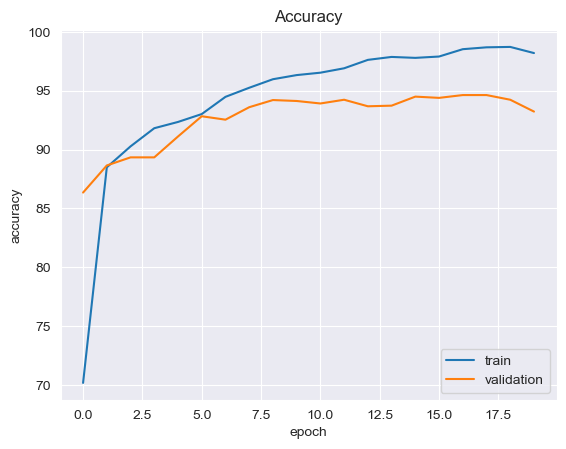

In [29]:
# Summarize history for accuracy
plt.plot(train_accuracies)
plt.plot(val_accuracies)
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
#plt.ylim((0, 1.1))
plt.show()

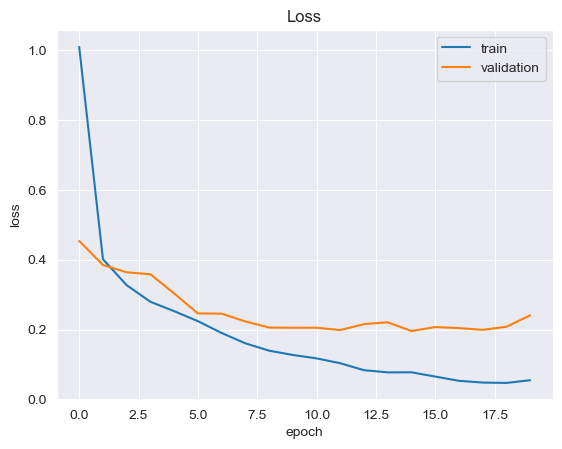

In [30]:
# Summarize history for loss
plt.plot(train_losses)
plt.plot(val_losses)
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
#plt.ylim((-0.1, 1.2))
plt.show()

### Model Evaluation

Evaluate the model

In [31]:
model(x_test)

tensor([[-1.2268,  5.4598, -0.7066,  ..., -2.7201,  0.9813, -1.3601],
        [-4.2860, -1.9143,  1.9285,  ..., -5.0482,  9.8211,  0.3779],
        [ 0.8750, -1.5602,  1.0853,  ..., -6.0732, 14.5167, -1.8916],
        ...,
        [11.5636, -4.0374, -2.6236,  ..., -9.1320, -0.7932, -1.8001],
        [-4.5358,  0.7952, -1.3468,  ...,  0.3448,  4.3248,  0.5588],
        [-2.5534, -8.8722, -0.4990,  ...,  1.4452,  0.4937, -0.6187]],
       grad_fn=<AddmmBackward0>)

****** Test Data ********
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       524
           1       0.98      0.96      0.97       627
           2       0.96      0.92      0.94       561
           3       0.97      0.82      0.89       559
           4       0.97      0.89      0.93       532
           5       0.91      0.95      0.93       463
           6       0.99      0.93      0.96       519
           7       0.98      0.92      0.95       611
           8       0.77      0.99      0.86       505
           9       0.86      0.94      0.90       499

    accuracy                           0.93      5400
   macro avg       0.93      0.93      0.93      5400
weighted avg       0.94      0.93      0.93      5400



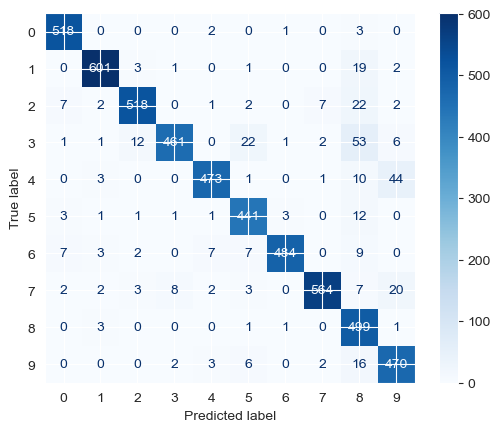

In [32]:
from sklearn import metrics
print("****** Test Data ********")

# Make a set of predictions for the test data
y_pred = model(x_test)
y_pred = torch.argmax(y_pred, dim=1).numpy()

# Print performance details
print(metrics.classification_report(y_test_cat, y_pred))

# Print confusion matrix
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test_cat, y_pred, cmap='Blues')
plt.show()

Plot some of the examples that the model classified correctly.

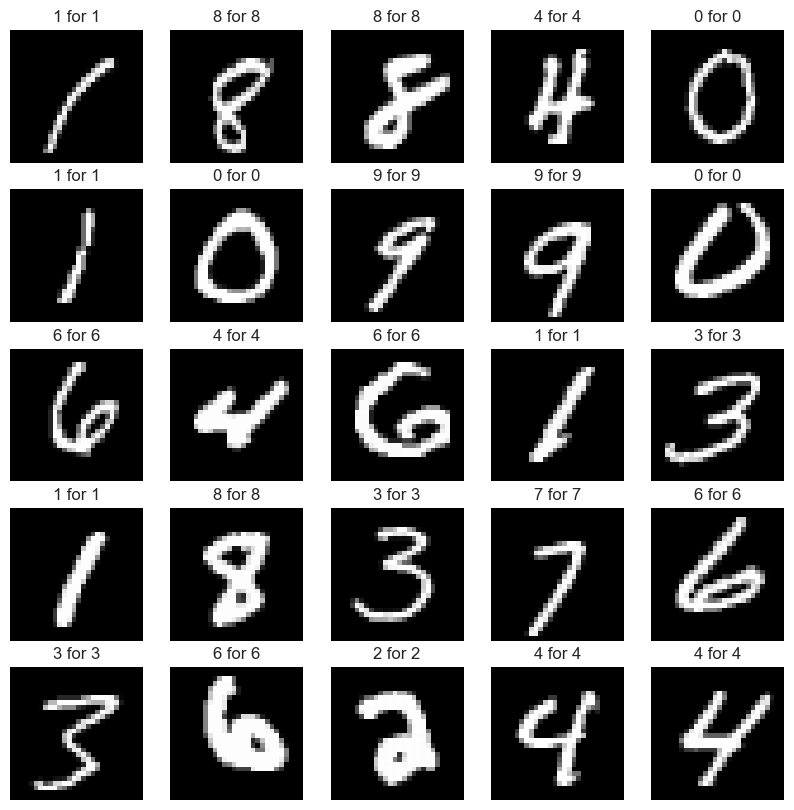

In [33]:
pltsize=2
row_images = 5
col_images = 5

maxtoshow = row_images * col_images
predictions = y_pred.reshape(-1)
corrects = predictions == y_test_cat
ii = 0
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(x_test.shape[0]):
    if ii>=maxtoshow:
        break
    if corrects.iloc[i]:
        plt.subplot(row_images,col_images, ii+1)
        plt.axis('off')
        plt.imshow((x_test_cat[i]).reshape(28,28), cmap='gray', vmin=-1, vmax=1)
        plt.title("{} for {}".format(predictions[i], y_test_cat.iloc[i]))
        ii = ii + 1
        
plt.show()

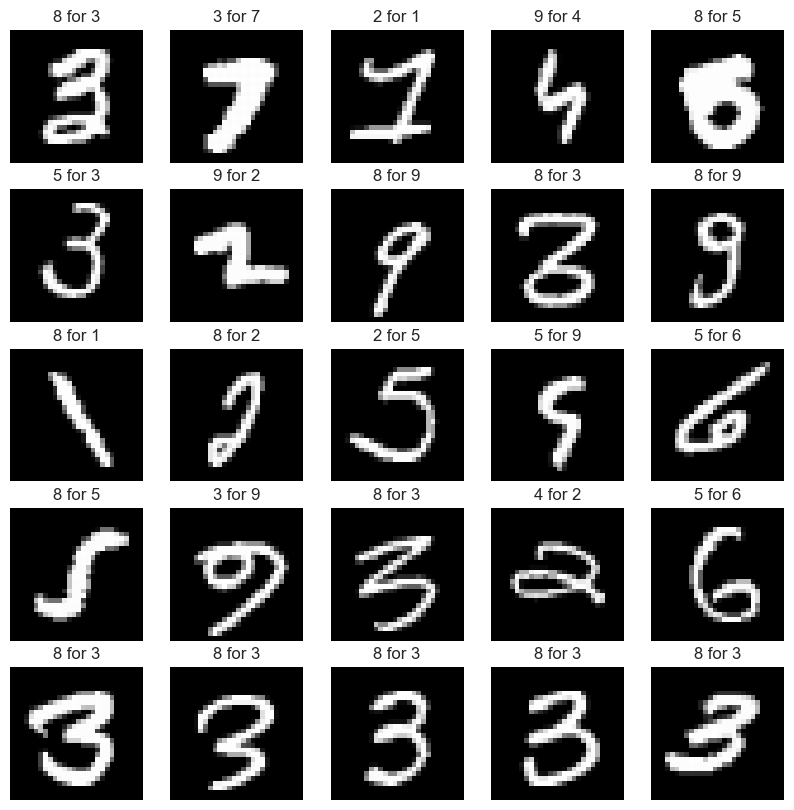

In [34]:
pltsize=2
row_images = 5
col_images = 5

maxtoshow = row_images * col_images
predictions = y_pred.reshape(-1)
errors = predictions != y_test_cat
ii = 0
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(x_test.shape[0]):
    if ii>=maxtoshow:
        break
    if errors.iloc[i]:
        plt.subplot(row_images,col_images, ii+1)
        plt.axis('off')
        plt.imshow((x_test_cat[i]).reshape(28,28), cmap='gray', vmin=-1, vmax=1)
        plt.title("{} for {}".format(predictions[i], y_test_cat.iloc[i]))
        ii = ii + 1
plt.show()